# Comparison of CDT and SDT in RL

(3, 2981)


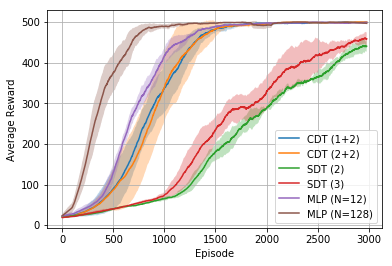

In [29]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import os
import csv


def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)


plt.figure(figsize=(6,4))

cdt12_data=[]
cdt22_data=[]
sdt2_data=[]
sdt3_data=[]
mlp12_data=[]
mlp128_data=[]
data_prefix='cartpole/'

for i in range(4,7):
    # CDT (1+2)
    directory =data_prefix+'cdt_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_cdt12=np.load(directory)
    cdt12_data.append(smooth(r_cdt12))
    # SDT (3)
    directory =data_prefix+'sdt_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_sdt3=np.load(directory)
    sdt3_data.append(smooth(r_sdt3))
    # CDT (2+2)
    directory =data_prefix+'cdt_ppo_discrete_CartPole-v1depth_22_id{}.npy'.format(i)
    r_cdt22=np.load(directory)
    cdt22_data.append(smooth(r_cdt22))
    # SDT (2)
    directory =data_prefix+'sdt_ppo_discrete_CartPole-v1depth_2_id{}.npy'.format(i)
    r_sdt2=np.load(directory)
    sdt2_data.append(smooth(r_sdt2))
    # MLP (N=128)
    directory =data_prefix+'mlp128_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_mlp128=np.array(np.concatenate((np.load(directory), [500])))
    mlp128_data.append(smooth(r_mlp128))
    # MLP (N=12)
    directory =data_prefix+'mlp12_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_mlp12=np.array(np.concatenate((np.load(directory), [500])))
    mlp12_data.append(smooth(r_mlp12))
    
#     # MLP (N=24)
#     directory ='mlp24_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
#     r_mlp24=np.array(np.load(directory)[:2981])
#     mlp24_data.append(smooth(r_mlp24))
    
print(np.array(cdt_data).shape)
x = np.arange(np.array(cdt_data).shape[1])

plot_with_fill(x, cdt12_data, label = 'CDT (1+2)')
plot_with_fill(x, cdt22_data, label = 'CDT (2+2)')
plot_with_fill(x, sdt2_data, label = 'SDT (2)')
plot_with_fill(x, sdt3_data, label = 'SDT (3)')
plot_with_fill(x, mlp12_data, label = 'MLP (N=12)')
plot_with_fill(x, mlp128_data, label = 'MLP (N=128)')


plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('./cdt_sdt.pdf')
plt.show()


# if __name__ == '__main__':

(4980,)
(4980,)
(4980,)
(4980,)
(4980,)
(4980,)
(3, 4980)


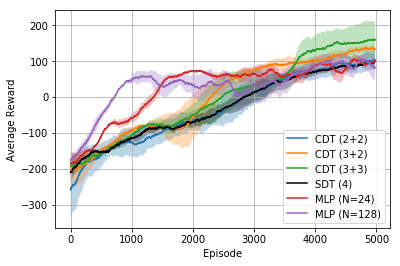

In [50]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import os
import csv


def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)


plt.figure(figsize=(6,4))

cdt22_data=[]
cdt23_data=[]
cdt32_data=[]
cdt33_data=[]
sdt4_data=[]
sdt5_data=[]
mlp24_data=[]
mlp128_data=[]
data_prefix='lunarlander/'
# data_prefix=''

# comparison:
# cdt: 2+2, 2+3, 3+2, 3+3
# sdt: 4, 5
# mlp: 24, 128

for i in range(4,7):
    # CDT (2+2)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_22_id{}.npy'.format(i)
    r_cdt22=np.load(directory)[:4980]
    print(r_cdt22.shape)
    cdt22_data.append(smooth(r_cdt22))
    
    # CDT (2+3)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_23_id{}.npy'.format(i)
    r_cdt23=np.load(directory)[:4980]
    cdt23_data.append(smooth(r_cdt23))
    
    # CDT (3+2)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_32_id{}.npy'.format(i)
    r_cdt32=np.load(directory)[:4980]
    cdt32_data.append(smooth(r_cdt32))
    
    # CDT (3+3)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_33_id{}.npy'.format(i)
    r_cdt33=np.load(directory)[:4980]
    cdt33_data.append(smooth(r_cdt33))

    # MLP (N=24)
    directory =data_prefix+'mlp24_ppo_discrete_LunarLander-v2_id{}.npy'.format(i)
    r_mlp24=np.load(directory)
    print(r_mlp24.shape)
    mlp24_data.append(smooth(r_mlp24))
    
    # MLP (N=128)
    directory =data_prefix+'mlp128_ppo_discrete_LunarLander-v2_id{}.npy'.format(i)
    r_mlp128=np.load(directory)
    mlp128_data.append(smooth(r_mlp128))
    
    # SDT (4)
    directory =data_prefix+'sdt_ppo_discrete_LunarLander-v2depth_4_id{}.npy'.format(i)
    r_sdt4=np.load(directory)[:4980]
    sdt4_data.append(smooth(r_sdt4))
    
# for i in range(4,6):
#     # SDT (5)
#     directory =data_prefix+'sdt_ppo_discrete_LunarLander-v2depth_5_id{}.npy'.format(i)
#     r_sdt5=np.load(directory)[:4980]
#     sdt5_data.append(smooth(r_sdt5))
    
    
print(np.array(cdt22_data).shape)
x = np.arange(np.array(cdt22_data).shape[1])

plot_with_fill(x, cdt22_data, label = 'CDT (2+2)')
# plot_with_fill(x, cdt23_data, label = 'CDT (2+3)')
plot_with_fill(x, cdt32_data, label = 'CDT (3+2)')
plot_with_fill(x, cdt33_data, label = 'CDT (3+3)')
plot_with_fill(x, sdt4_data, label = 'SDT (4)', color='black')
# plot_with_fill(x, sdt5_data, label = 'SDT (5)')
plot_with_fill(x, mlp24_data, label = 'MLP (N=24)')
plot_with_fill(x, mlp128_data, label = 'MLP (N=128)')


plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('./cdt_sdt.pdf')
plt.show()


# if __name__ == '__main__':

## Black/White version

In [19]:
marker=["o", "p", "^", "s", "+", "x"]

(3, 2981)


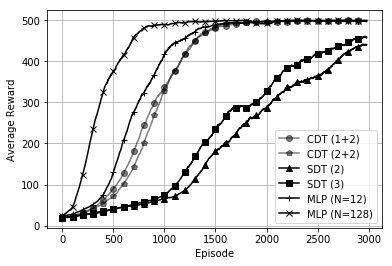

In [30]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import os
import csv


def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)


plt.figure(figsize=(6,4))

cdt12_data=[]
cdt22_data=[]
sdt2_data=[]
sdt3_data=[]
mlp12_data=[]
mlp128_data=[]
data_prefix='cartpole/'

for i in range(4,7):
    # CDT (1+2)
    directory =data_prefix+'cdt_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_cdt12=np.load(directory)
    cdt12_data.append(smooth(r_cdt12))
    # SDT (3)
    directory =data_prefix+'sdt_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_sdt3=np.load(directory)
    sdt3_data.append(smooth(r_sdt3))
    # CDT (2+2)
    directory =data_prefix+'cdt_ppo_discrete_CartPole-v1depth_22_id{}.npy'.format(i)
    r_cdt22=np.load(directory)
    cdt22_data.append(smooth(r_cdt22))
    # SDT (2)
    directory =data_prefix+'sdt_ppo_discrete_CartPole-v1depth_2_id{}.npy'.format(i)
    r_sdt2=np.load(directory)
    sdt2_data.append(smooth(r_sdt2))
    # MLP (N=128)
    directory =data_prefix+'mlp128_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_mlp128=np.array(np.concatenate((np.load(directory), [500])))
    mlp128_data.append(smooth(r_mlp128))
    # MLP (N=12)
    directory =data_prefix+'mlp12_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
    r_mlp12=np.array(np.concatenate((np.load(directory), [500])))
    mlp12_data.append(smooth(r_mlp12))
    
#     # MLP (N=24)
#     directory ='mlp24_ppo_discrete_CartPole-v1_id{}.npy'.format(i)
#     r_mlp24=np.array(np.load(directory)[:2981])
#     mlp24_data.append(smooth(r_mlp24))
    
print(np.array(cdt12_data).shape)
x = np.arange(np.array(cdt12_data).shape[1])

plt.plot(x, np.mean(cdt12_data, axis=0), label = 'CDT (1+2)', marker=marker[0], markevery=100, c='black', alpha=0.5)
plt.plot(x, np.mean(cdt22_data, axis=0), label = 'CDT (2+2)', marker=marker[1], markevery=100, c='black', alpha=0.5)
plt.plot(x, np.mean(sdt2_data, axis=0), label = 'SDT (2)', marker=marker[2], markevery=100, c='black')
plt.plot(x, np.mean(sdt3_data, axis=0), label = 'SDT (3)', marker=marker[3], markevery=100, c='black')
plt.plot(x, np.mean(mlp12_data, axis=0), label = 'MLP (N=12)', marker=marker[4], markevery=100, c='black')
plt.plot(x, np.mean(mlp128_data, axis=0), label = 'MLP (N=128)', marker=marker[5], markevery=100, c='black')


plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('./cdt_sdt.pdf')
plt.show()


# if __name__ == '__main__':

(4980,)
(4980,)
(4980,)
(4980,)
(4980,)
(4980,)
(3, 4980)


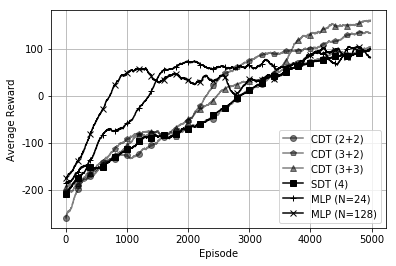

In [31]:
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt
import os
import csv


def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]


def plot_with_fill(x, data, label, color=None):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    if color is not None:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
    )   
    else:
        plt.fill_between(
        x, list(y_lower), list(y_upper), interpolate=True, linewidth=0.0, alpha=0.3
    )     
    plt.plot(x, list(y_m), color=color, label=label)


plt.figure(figsize=(6,4))

cdt22_data=[]
cdt23_data=[]
cdt32_data=[]
cdt33_data=[]
sdt4_data=[]
sdt5_data=[]
mlp24_data=[]
mlp128_data=[]
data_prefix='lunarlander/'
# data_prefix=''

# comparison:
# cdt: 2+2, 2+3, 3+2, 3+3
# sdt: 4, 5
# mlp: 24, 128

for i in range(4,7):
    # CDT (2+2)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_22_id{}.npy'.format(i)
    r_cdt22=np.load(directory)[:4980]
    print(r_cdt22.shape)
    cdt22_data.append(smooth(r_cdt22))
    
    # CDT (2+3)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_23_id{}.npy'.format(i)
    r_cdt23=np.load(directory)[:4980]
    cdt23_data.append(smooth(r_cdt23))
    
    # CDT (3+2)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_32_id{}.npy'.format(i)
    r_cdt32=np.load(directory)[:4980]
    cdt32_data.append(smooth(r_cdt32))
    
    # CDT (3+3)
    directory =data_prefix+'cdt_ppo_discrete_LunarLander-v2depth_33_id{}.npy'.format(i)
    r_cdt33=np.load(directory)[:4980]
    cdt33_data.append(smooth(r_cdt33))

    # MLP (N=24)
    directory =data_prefix+'mlp24_ppo_discrete_LunarLander-v2_id{}.npy'.format(i)
    r_mlp24=np.load(directory)
    print(r_mlp24.shape)
    mlp24_data.append(smooth(r_mlp24))
    
    # MLP (N=128)
    directory =data_prefix+'mlp128_ppo_discrete_LunarLander-v2_id{}.npy'.format(i)
    r_mlp128=np.load(directory)
    mlp128_data.append(smooth(r_mlp128))
    
    # SDT (4)
    directory =data_prefix+'sdt_ppo_discrete_LunarLander-v2depth_4_id{}.npy'.format(i)
    r_sdt4=np.load(directory)[:4980]
    sdt4_data.append(smooth(r_sdt4))
    
# for i in range(4,6):
#     # SDT (5)
#     directory =data_prefix+'sdt_ppo_discrete_LunarLander-v2depth_5_id{}.npy'.format(i)
#     r_sdt5=np.load(directory)[:4980]
#     sdt5_data.append(smooth(r_sdt5))
    
    
print(np.array(cdt22_data).shape)
x = np.arange(np.array(cdt22_data).shape[1])

plt.plot(x, np.mean(cdt22_data, axis=0), label = 'CDT (2+2)', marker=marker[0], markevery=200, c='black', alpha=0.5)
plt.plot(x, np.mean(cdt32_data, axis=0), label = 'CDT (3+2)', marker=marker[1], markevery=200, c='black', alpha=0.5)
plt.plot(x, np.mean(cdt33_data, axis=0), label = 'CDT (3+3)', marker=marker[2], markevery=200, c='black', alpha=0.5)
plt.plot(x, np.mean(sdt4_data, axis=0), label = 'SDT (4)', marker=marker[3], markevery=200, c='black')
plt.plot(x, np.mean(mlp24_data, axis=0), label = 'MLP (N=24)', marker=marker[4], markevery=200, c='black')
plt.plot(x, np.mean(mlp128_data, axis=0), label = 'MLP (N=128)', marker=marker[5], markevery=200, c='black')


plt.xlabel('Episode')
plt.ylabel('Average Reward')
leg= plt.legend(loc=4)
plt.grid()
plt.savefig('./cdt_sdt.pdf')
plt.show()


# if __name__ == '__main__':